In [1]:
import numpy as np
from scipy.integrate import trapz
import matplotlib.pyplot as plt

In [2]:
e = np.linspace(6, 7, 10000)

# Pure Uranium

In [3]:
@np.vectorize
def absorption_uranium(energy):
    if energy < 6.52:
        return 0.0
    elif energy < 6.57:
        return 160000 * (energy - 6.52)
    elif energy < 6.62:
        return 160000 * (6.62 - energy)
    else:
        return 0.0

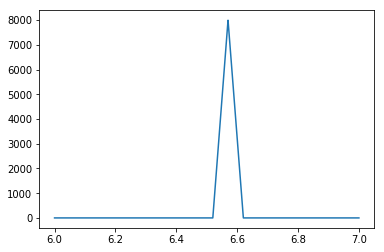

In [4]:
plt.plot(e, absorption_uranium(e))

In [5]:
def total_uranium(energy):
    scattering = 5
    return absorption_uranium(energy) + scattering

scale = $\int_6^7 \frac{dE}{E\sigma_t(E)}$ performed numerically:

In [6]:
f = lambda e: 1 / e / total_uranium(e)
trapz(f(e), e)

0.02779948909719237

In [7]:
def flux_uranium(energy):
    scale = 0.02779948909719237
    return (1 / (energy * total_uranium(energy))) / scale

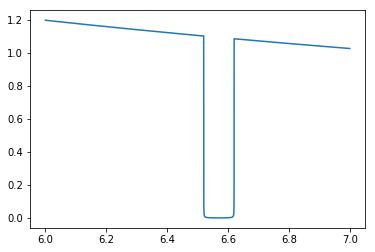

In [8]:
plt.plot(e, flux_uranium(e))

In [9]:
def integrand_uranium(energy):
    return total_uranium(energy) * flux_uranium(energy) / energy

In [10]:
trapz(integrand_uranium(e), e)

0.8564734311892805

# Hydrogen

In [11]:
def total_hydrogen(energy):
    return 20

scale = $\frac{1}{\sigma_t^H} (\ln(7) - \ln(6)) = \frac{20}{0.15415} = 0.007708$

In [12]:
def flux_hydrogen(energy):
    scale = 0.007707533991670044
    return (1 / energy / total_hydrogen(energy)) / scale

In [13]:
def integrand_hydrogen(energy):
    return total_hydrogen(energy) * flux_hydrogen(energy) / energy

In [14]:
trapz(integrand_hydrogen(e), e)

3.089123426262357

# Mixed Hydrogen and Uranium (50/50)

In [15]:
def total(energy):
    return 0.5 * total_hydrogen(energy) + 0.5 * total_uranium(energy)

In [16]:
def flux(energy):
    scale = 0.011136277967125305
    return 1 / total(energy) / energy / scale

In [17]:
def integrand_mixed(energy):
    return total(energy) * flux(energy) / energy

In [18]:
trapz(integrand_mixed(e), e)

2.138014503828651